# Importing modules and libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

# Data Preprocessing

### Importing data 

In [3]:
data_path = "diabetes_data.csv"
df = pd.read_csv(data_path)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

#### Statistical Information of the continuous variables

In [5]:
df[['BMI', 'MentHlth', 'PhysHlth']].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.0,0.0,2.0,30.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.0,0.0,3.0,30.0


In [6]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

##### Observation: No null values.

#### Observing count of each class in each feature including target

In [7]:
for column in df.columns:
    print(f"Value counts for column {column}:")
    print(df[column].value_counts())

Value counts for column Diabetes_012:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
Value counts for column HighBP:
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64
Value counts for column HighChol:
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64
Value counts for column CholCheck:
CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64
Value counts for column BMI:
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64
Value counts for column Smoker:
Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64
Value counts for column Stroke:
Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64
Value counts for column HeartDiseaseorAttack:
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64
Value counts for column PhysActivity:
PhysActivity
1.0    19

#### Checking for duplicates and removing them

In [8]:
duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df)) * 100
print("Number of duplicate rows: ", duplicate_count)
print(f"Percentage of duplicate rows: { duplicate_percentage:.2f}%")

df.drop_duplicates(inplace=True)
print("Number of remaining rows", len(df))

Number of duplicate rows:  23899
Percentage of duplicate rows: 9.42%
Number of remaining rows 229781


# EDA

#### Visualizing the distribution of our target variable

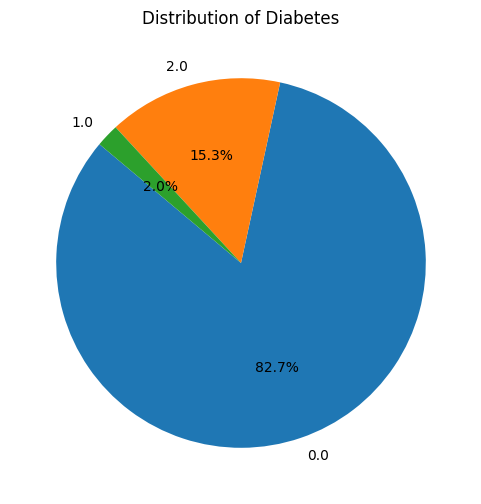

In [9]:
category_counts = df['Diabetes_012'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes')
plt.show()

#### Plotting the bar plot of the categorical features and the target variable

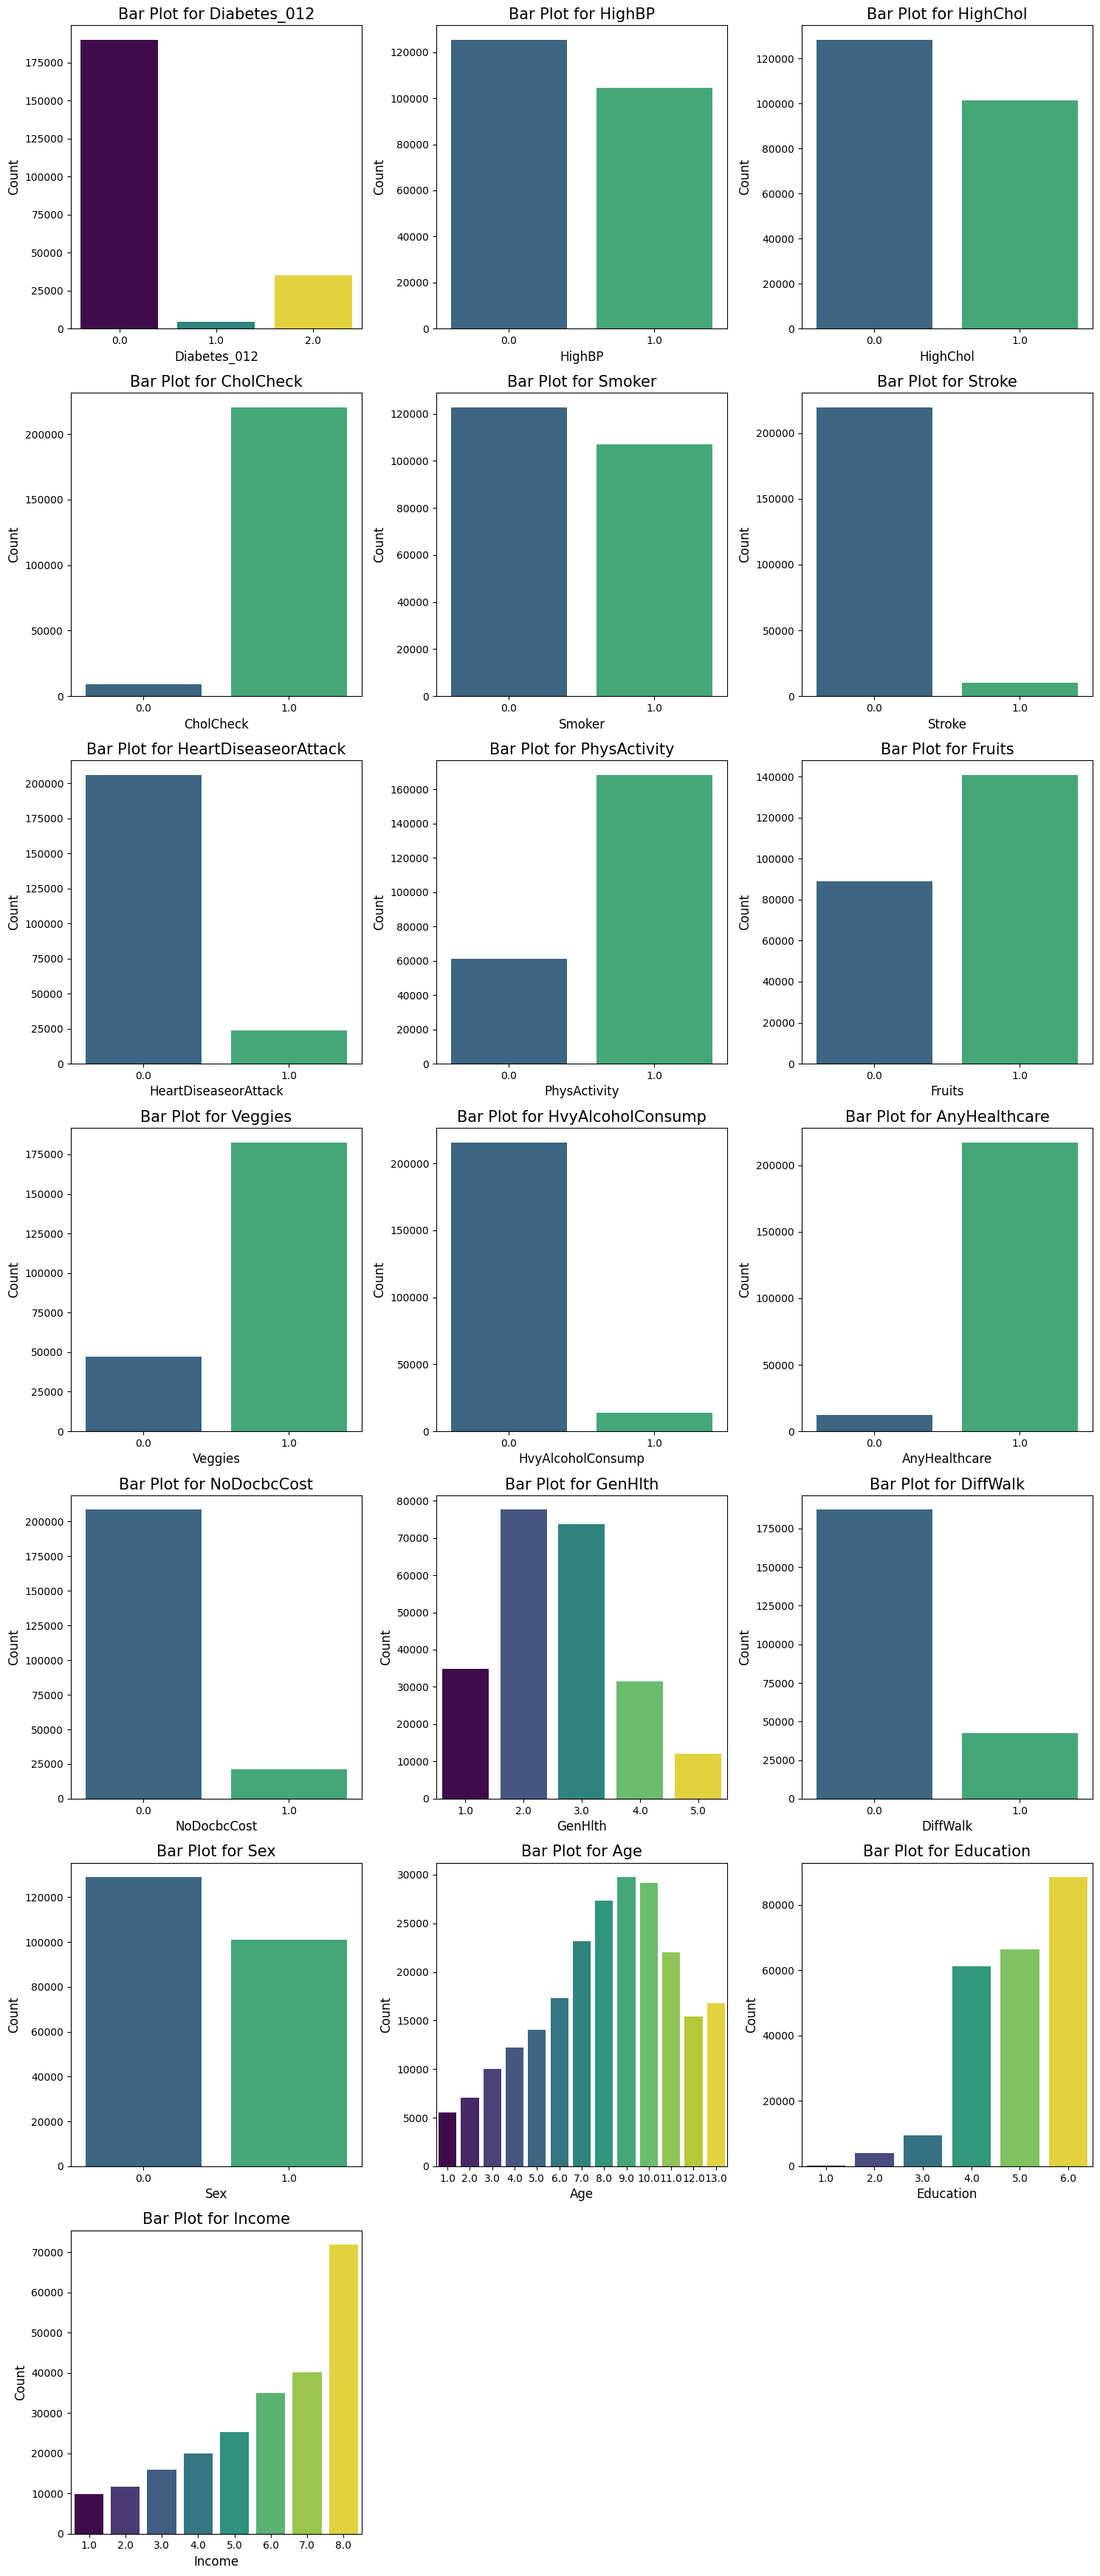

In [10]:
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']
categorical_cols = [col for col in df.columns if col not in ['BMI', 'MentHlth', 'PhysHlth']]

num_cols = len(categorical_cols)
num_plots = num_cols
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

plot_counter = 0
for i in range(num_rows):
    for j in range(3):
        if plot_counter >= num_plots:
            axes[i, j].axis('off')
        else:
            column = categorical_cols[plot_counter]
            if column not in ['BMI', 'MentHlth', 'PhysHlth']:
                sns.countplot(x=column, data=df, hue=column, palette='viridis', ax=axes[i, j], legend=False)
                axes[i, j].set_title(f'Bar Plot for {column}', fontsize=15)
                axes[i, j].set_xlabel(column, fontsize=12)
                axes[i, j].set_ylabel('Count', fontsize=12)
            plot_counter += 1

plt.tight_layout()
plt.show()

##### Observation: There is a significant class imbalance as the count of class 1 (pre-diabetic) is much less than classes 0 and 2 (Not diabetic and diabetic).

#### Plotting distribution again for General Health and Age but after categorization

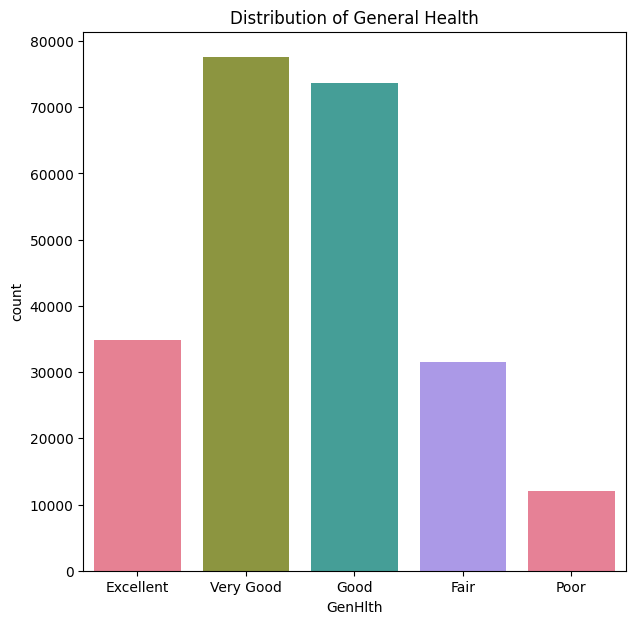

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax = sns.countplot(data=df, x='GenHlth', hue='GenHlth', legend=False, palette='husl')
ax.set(title='Distribution of General Health')
ax.set_xticks(range(len(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])))
ax.set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.show()


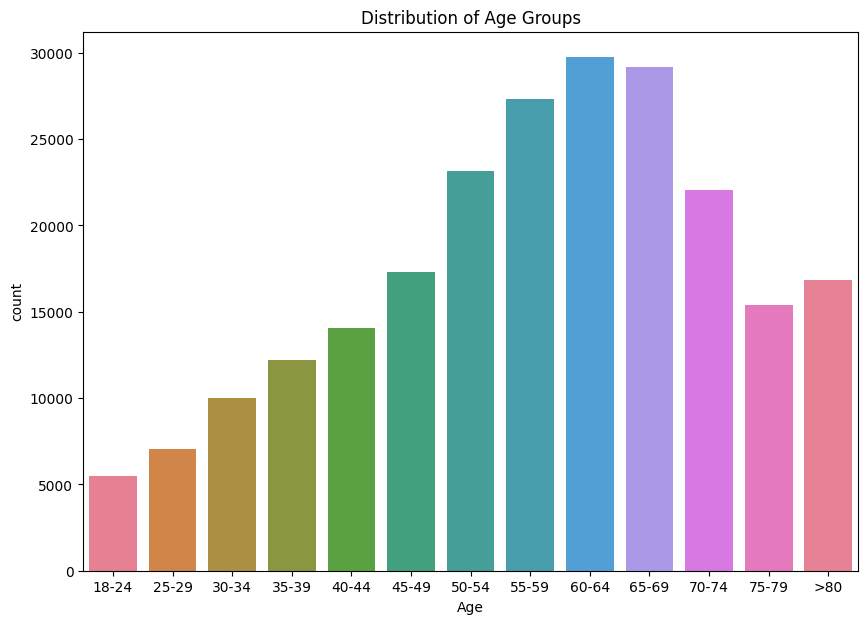

In [12]:

fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax = sns.countplot(data=df, x='Age', hue='Age', legend=False, palette='husl')
ax.set(title='Distribution of Age Groups')
ax.set_xticks(range(len(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                         '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'])))
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'])
plt.show()


#### Grouping the data by age and diabetes status and plotting the bar plot


<Axes: xlabel='Age'>

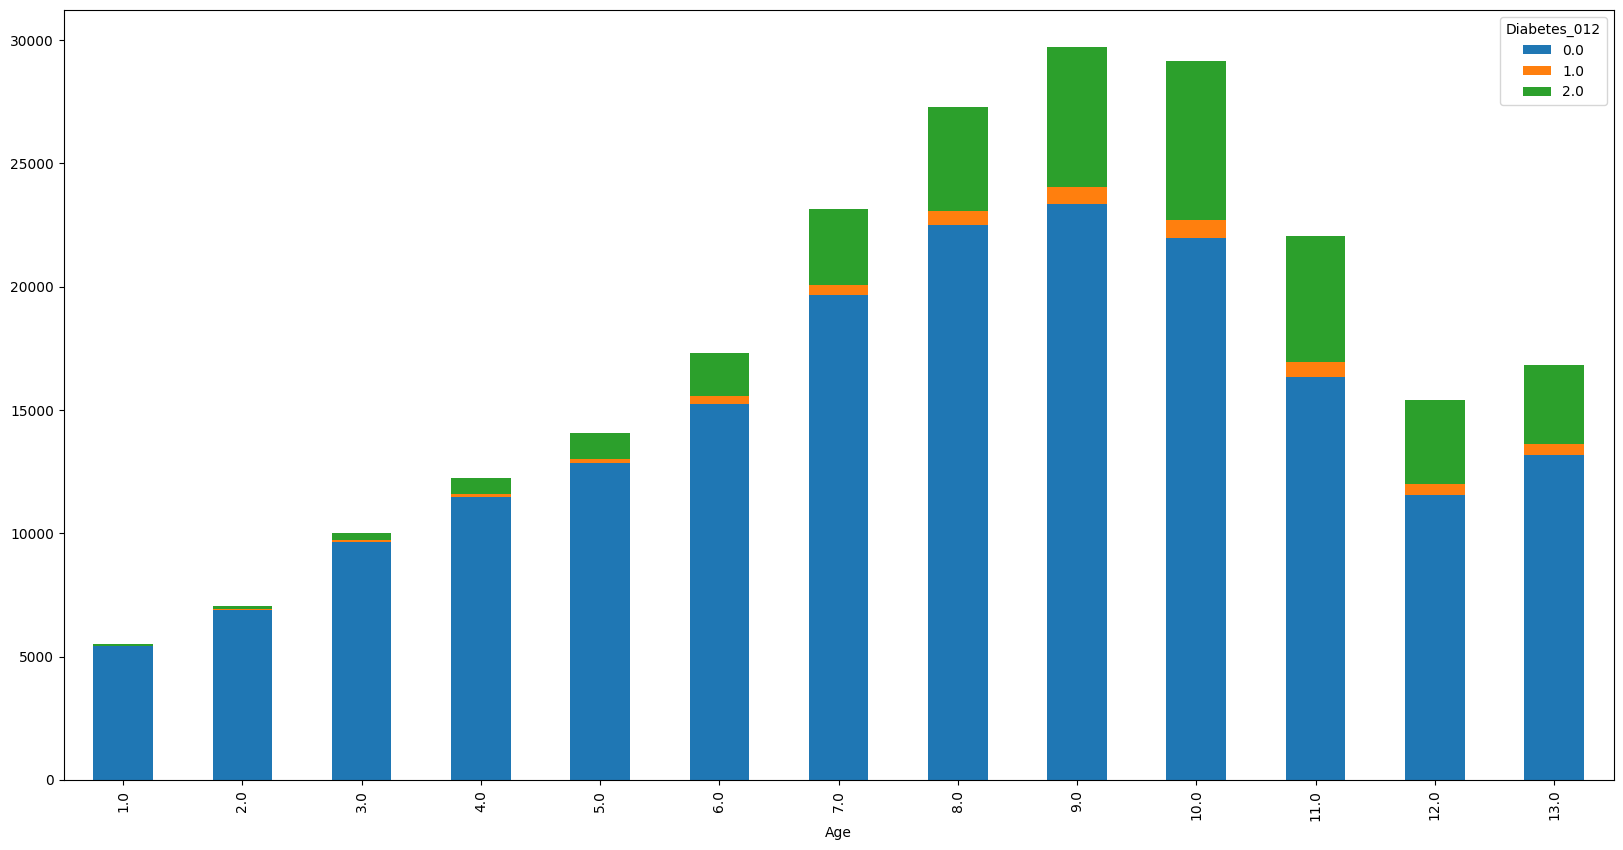

In [13]:
df.groupby(['Age', 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))

#### Plotting the distribution of the continuous features

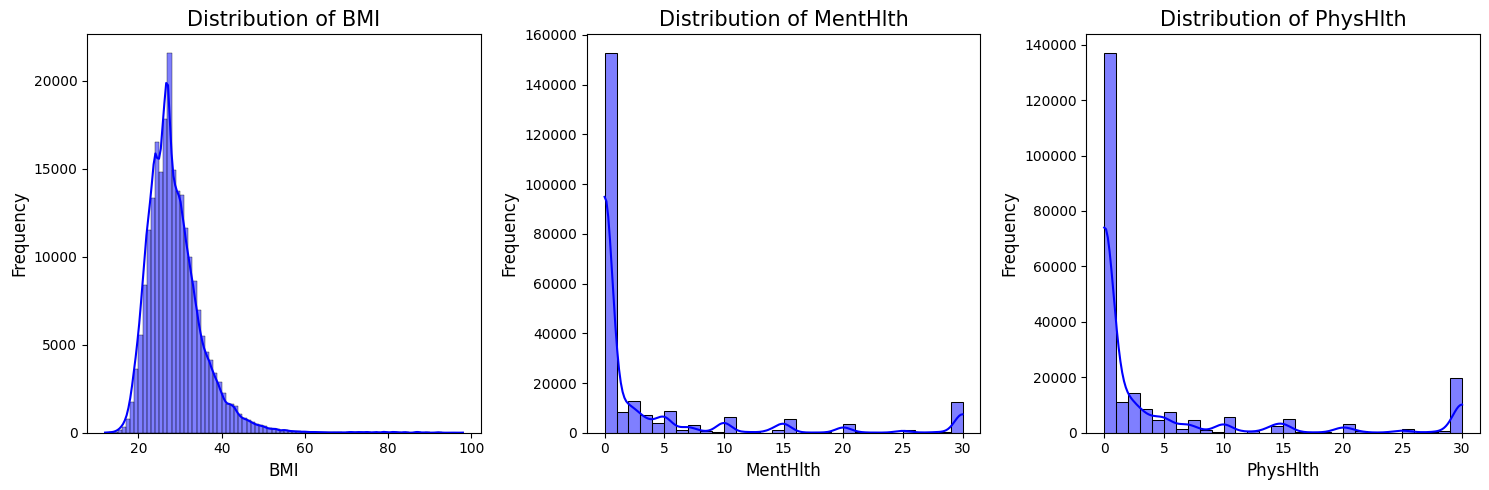

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], color='blue', kde=True, binwidth=1)
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


#### Plotting the distribution of the continuous features in pair with the mean and median

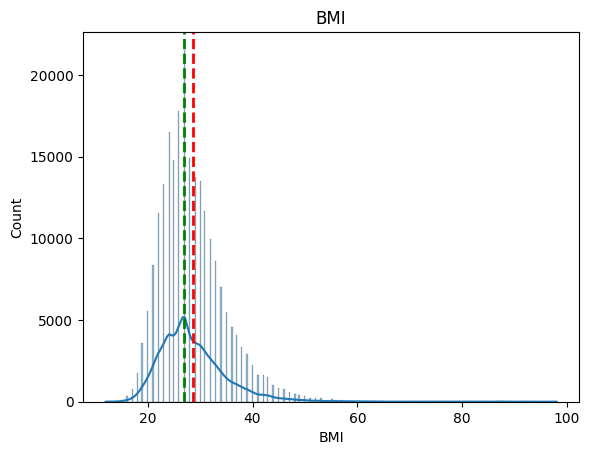

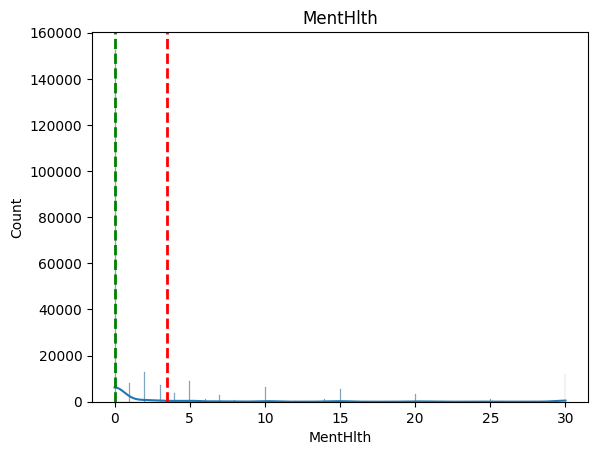

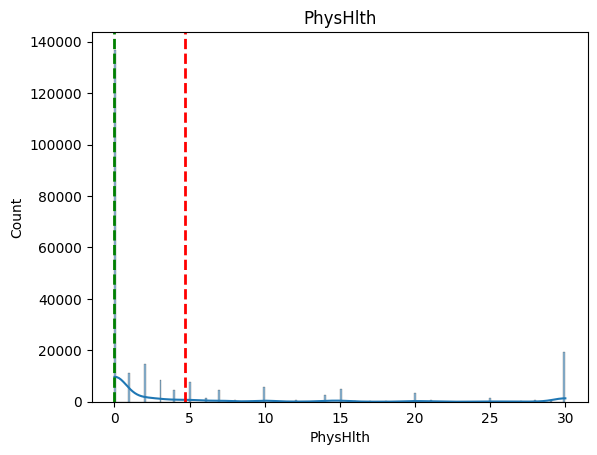

In [15]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=2)
    plt.title(col)
    plt.show()


#### Plotting the box plot of the continuous features

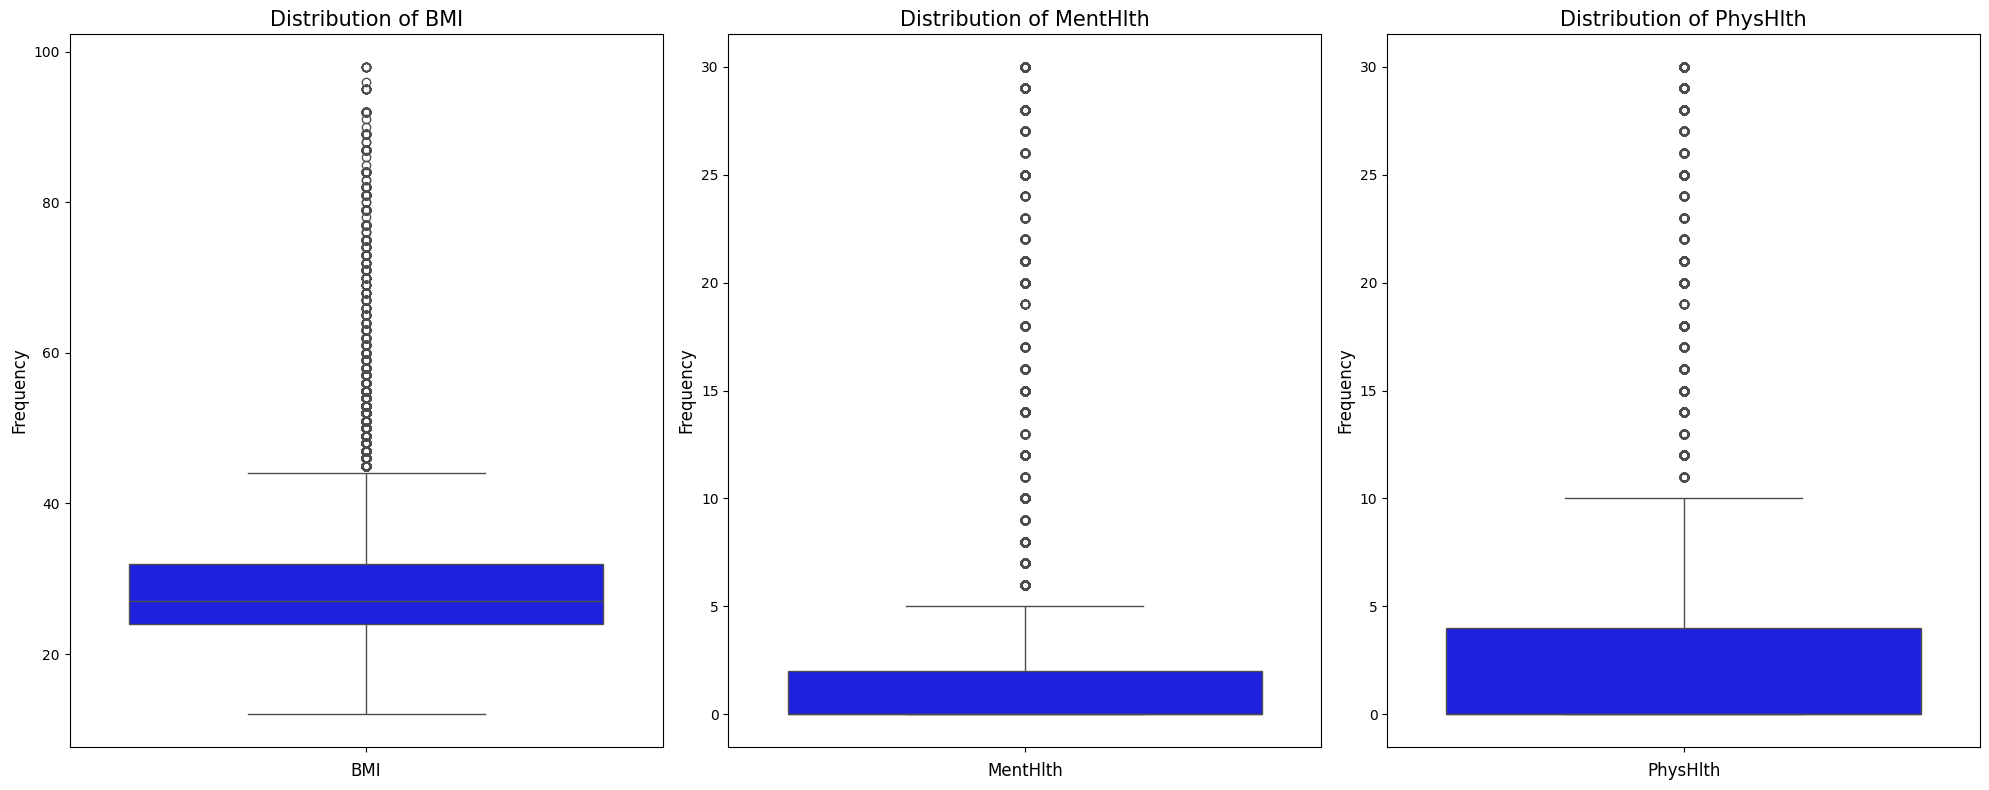

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col], ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [17]:
# from scipy.stats import norm
# from scipy.stats import zscore

# # Removing outliers using Median Absolute Deviation (MAD)
# const = 1.4826
# threshold = 3
# mad = const * np.median(np.abs(zscore(df[numerical_cols])))
# a = len(df)
# df = df[(np.abs(zscore(df[numerical_cols])) < threshold * mad).all(axis=1)]
# print(a - len(df))

##### Observation: No need to remove the outliers.

#### Plotting the bar plot of each categorical feature to observe target distribution

In [18]:
categorical_cols.remove('Diabetes_012')

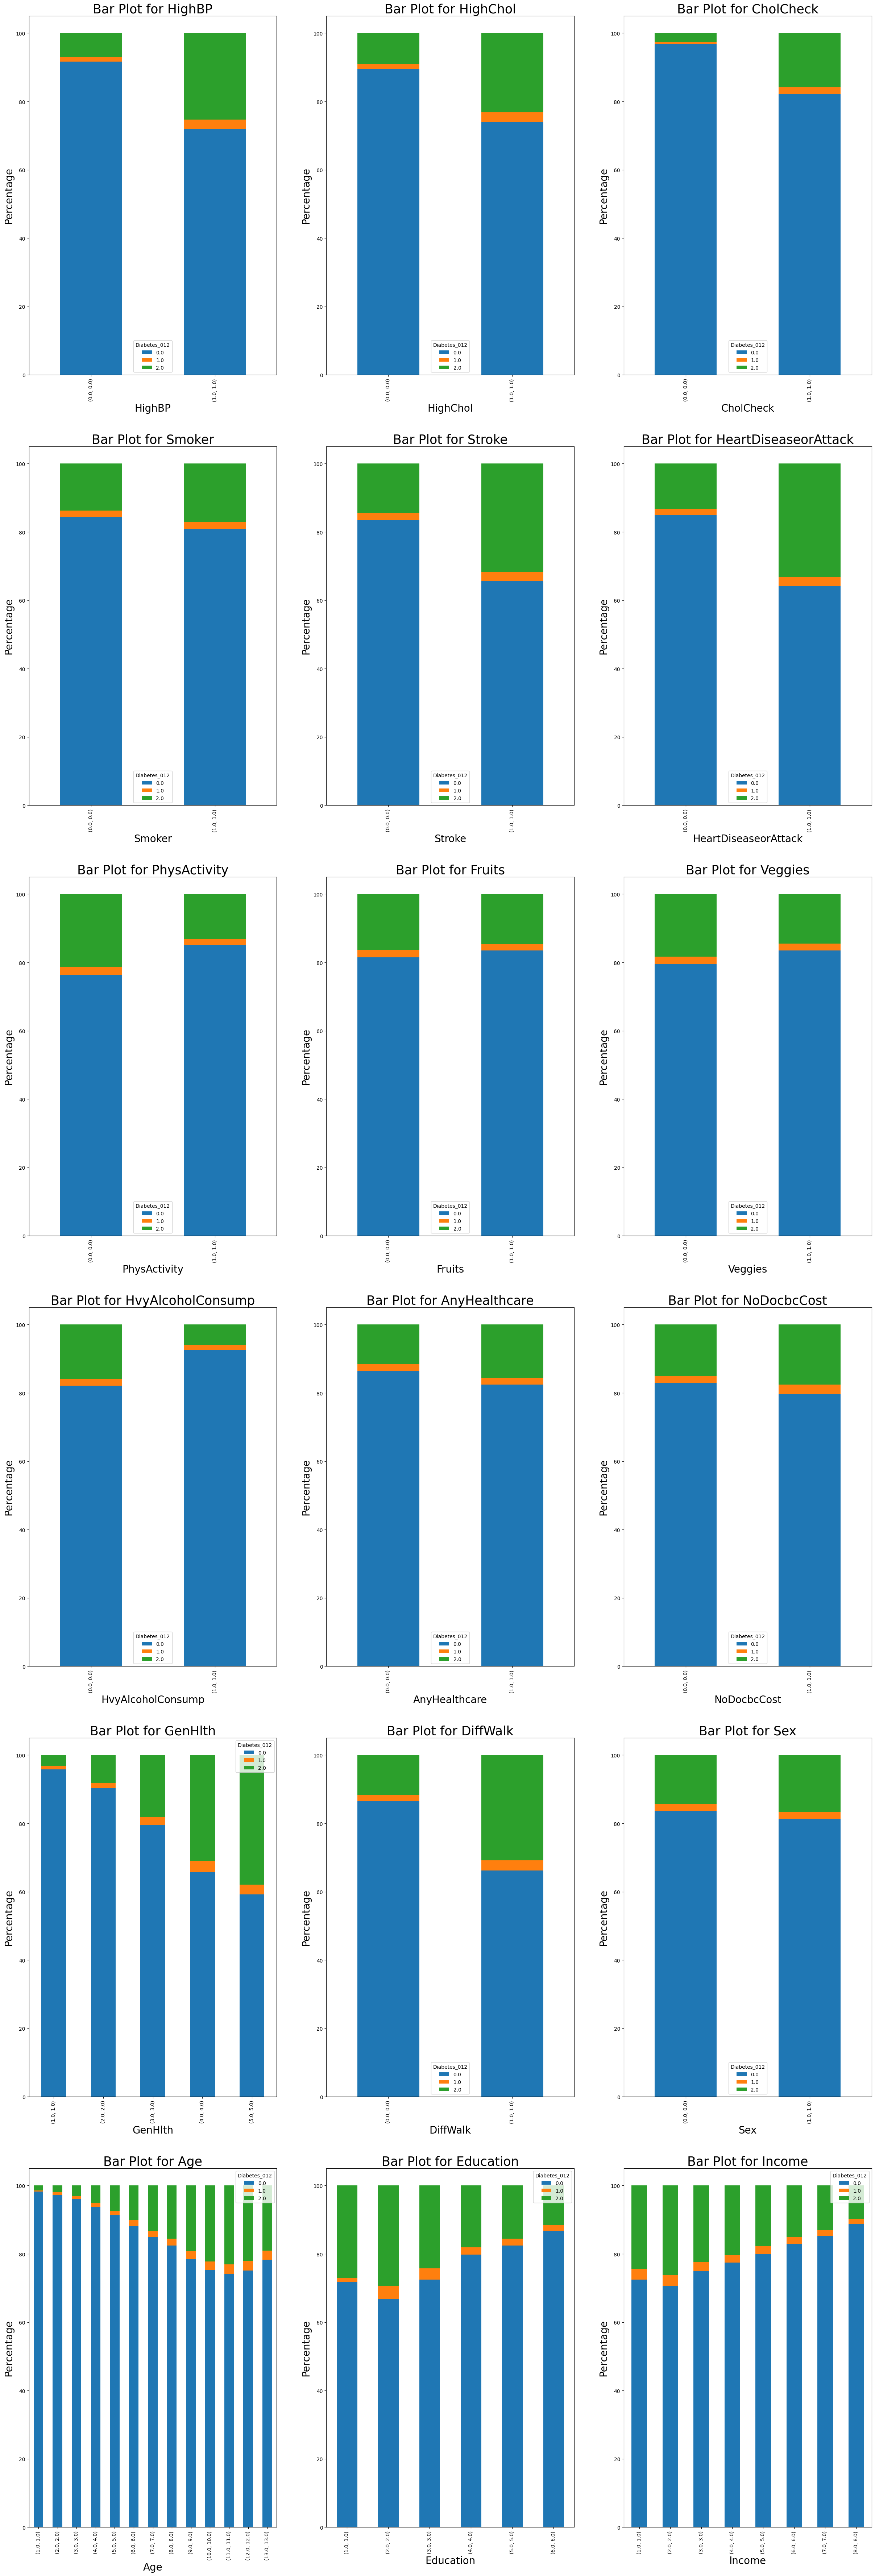

In [19]:
num_cols = len(categorical_cols)
num_plots = num_cols
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(30, 15 * num_rows))

plot_counter = 0

for i in range(num_rows):
    for j in range(3):
        if plot_counter >= num_plots:
            axes[i, j].axis('off')
        else:
            column = categorical_cols[plot_counter]
            df.groupby([column, 'Diabetes_012']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', stacked=True, ax=axes[i, j])
            axes[i, j].set_title(f'Bar Plot for {column}', fontsize=25)
            axes[i, j].set_xlabel(column, fontsize=20)
            axes[i, j].set_ylabel('Percentage', fontsize=20)
            plot_counter += 1

#### Plotting the distribution of the continuous features with the target

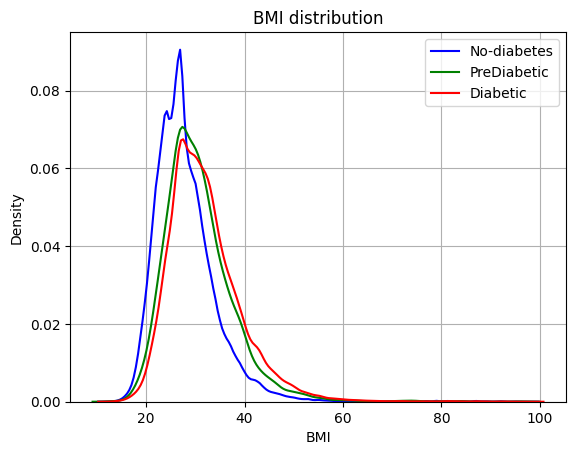

In [20]:
bmi_no = df[df['Diabetes_012'] == 0]['BMI']
bmi_pre = df[df['Diabetes_012'] == 1]['BMI']
bmi_yes = df[df['Diabetes_012'] == 2]['BMI']

sns.kdeplot(bmi_no,color='blue')
sns.kdeplot(bmi_pre,color='green')
sns.kdeplot(bmi_yes,color='red')

plt.grid()
plt.title('BMI distribution')
plt.legend(['No-diabetes', 'PreDiabetic', 'Diabetic'])
plt.show()

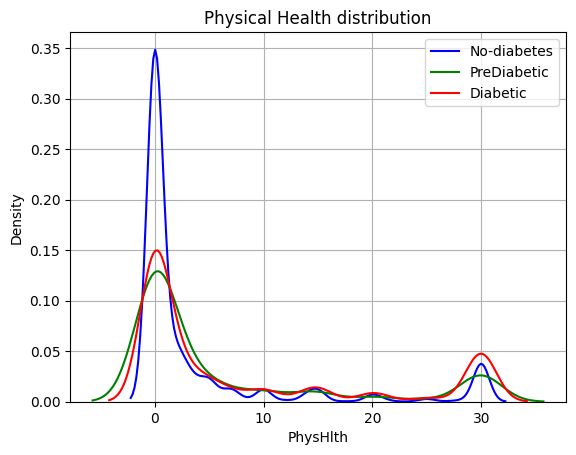

In [21]:
phyhlth_no = df[df['Diabetes_012'] == 0]['PhysHlth']
phyhlth_pre = df[df['Diabetes_012'] == 1]['PhysHlth']
phyhlth_yes = df[df['Diabetes_012'] == 2]['PhysHlth']

sns.kdeplot(phyhlth_no,color='blue')
sns.kdeplot(phyhlth_pre,color='green')
sns.kdeplot(phyhlth_yes,color='red')

plt.grid()
plt.title('Physical Health distribution')
plt.legend(['No-diabetes', 'PreDiabetic', 'Diabetic'])
plt.show()

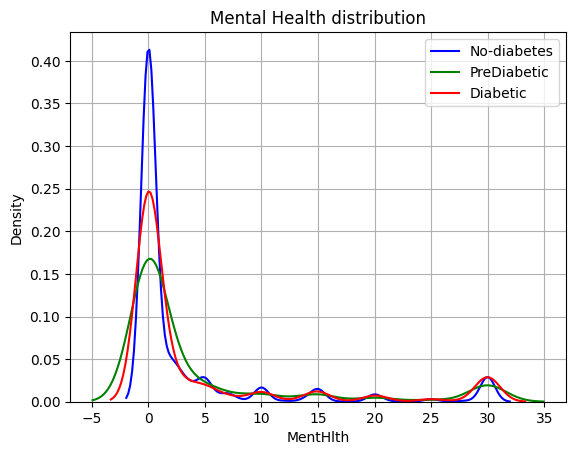

In [22]:
menthlth_no = df[df['Diabetes_012'] == 0]['MentHlth']
menthlth_pre = df[df['Diabetes_012'] == 1]['MentHlth']
menthlth_yes = df[df['Diabetes_012'] == 2]['MentHlth']

sns.kdeplot(menthlth_no,color='blue')
sns.kdeplot(menthlth_pre,color='green')
sns.kdeplot(menthlth_yes,color='red')

plt.grid()
plt.title('Mental Health distribution')
plt.legend(['No-diabetes', 'PreDiabetic', 'Diabetic'])
plt.show()

#### Observations:
- Most age groups that are affected by diabetes are: 60-64, 65-70, 70-74
- Diabetic people have higher BMI, Cholesterol levels, Blood Pressure
- Smoking and drinking have no significant effect on diabetes
- Diabetic people have poorer general health

#### Plotting the correlation matrix

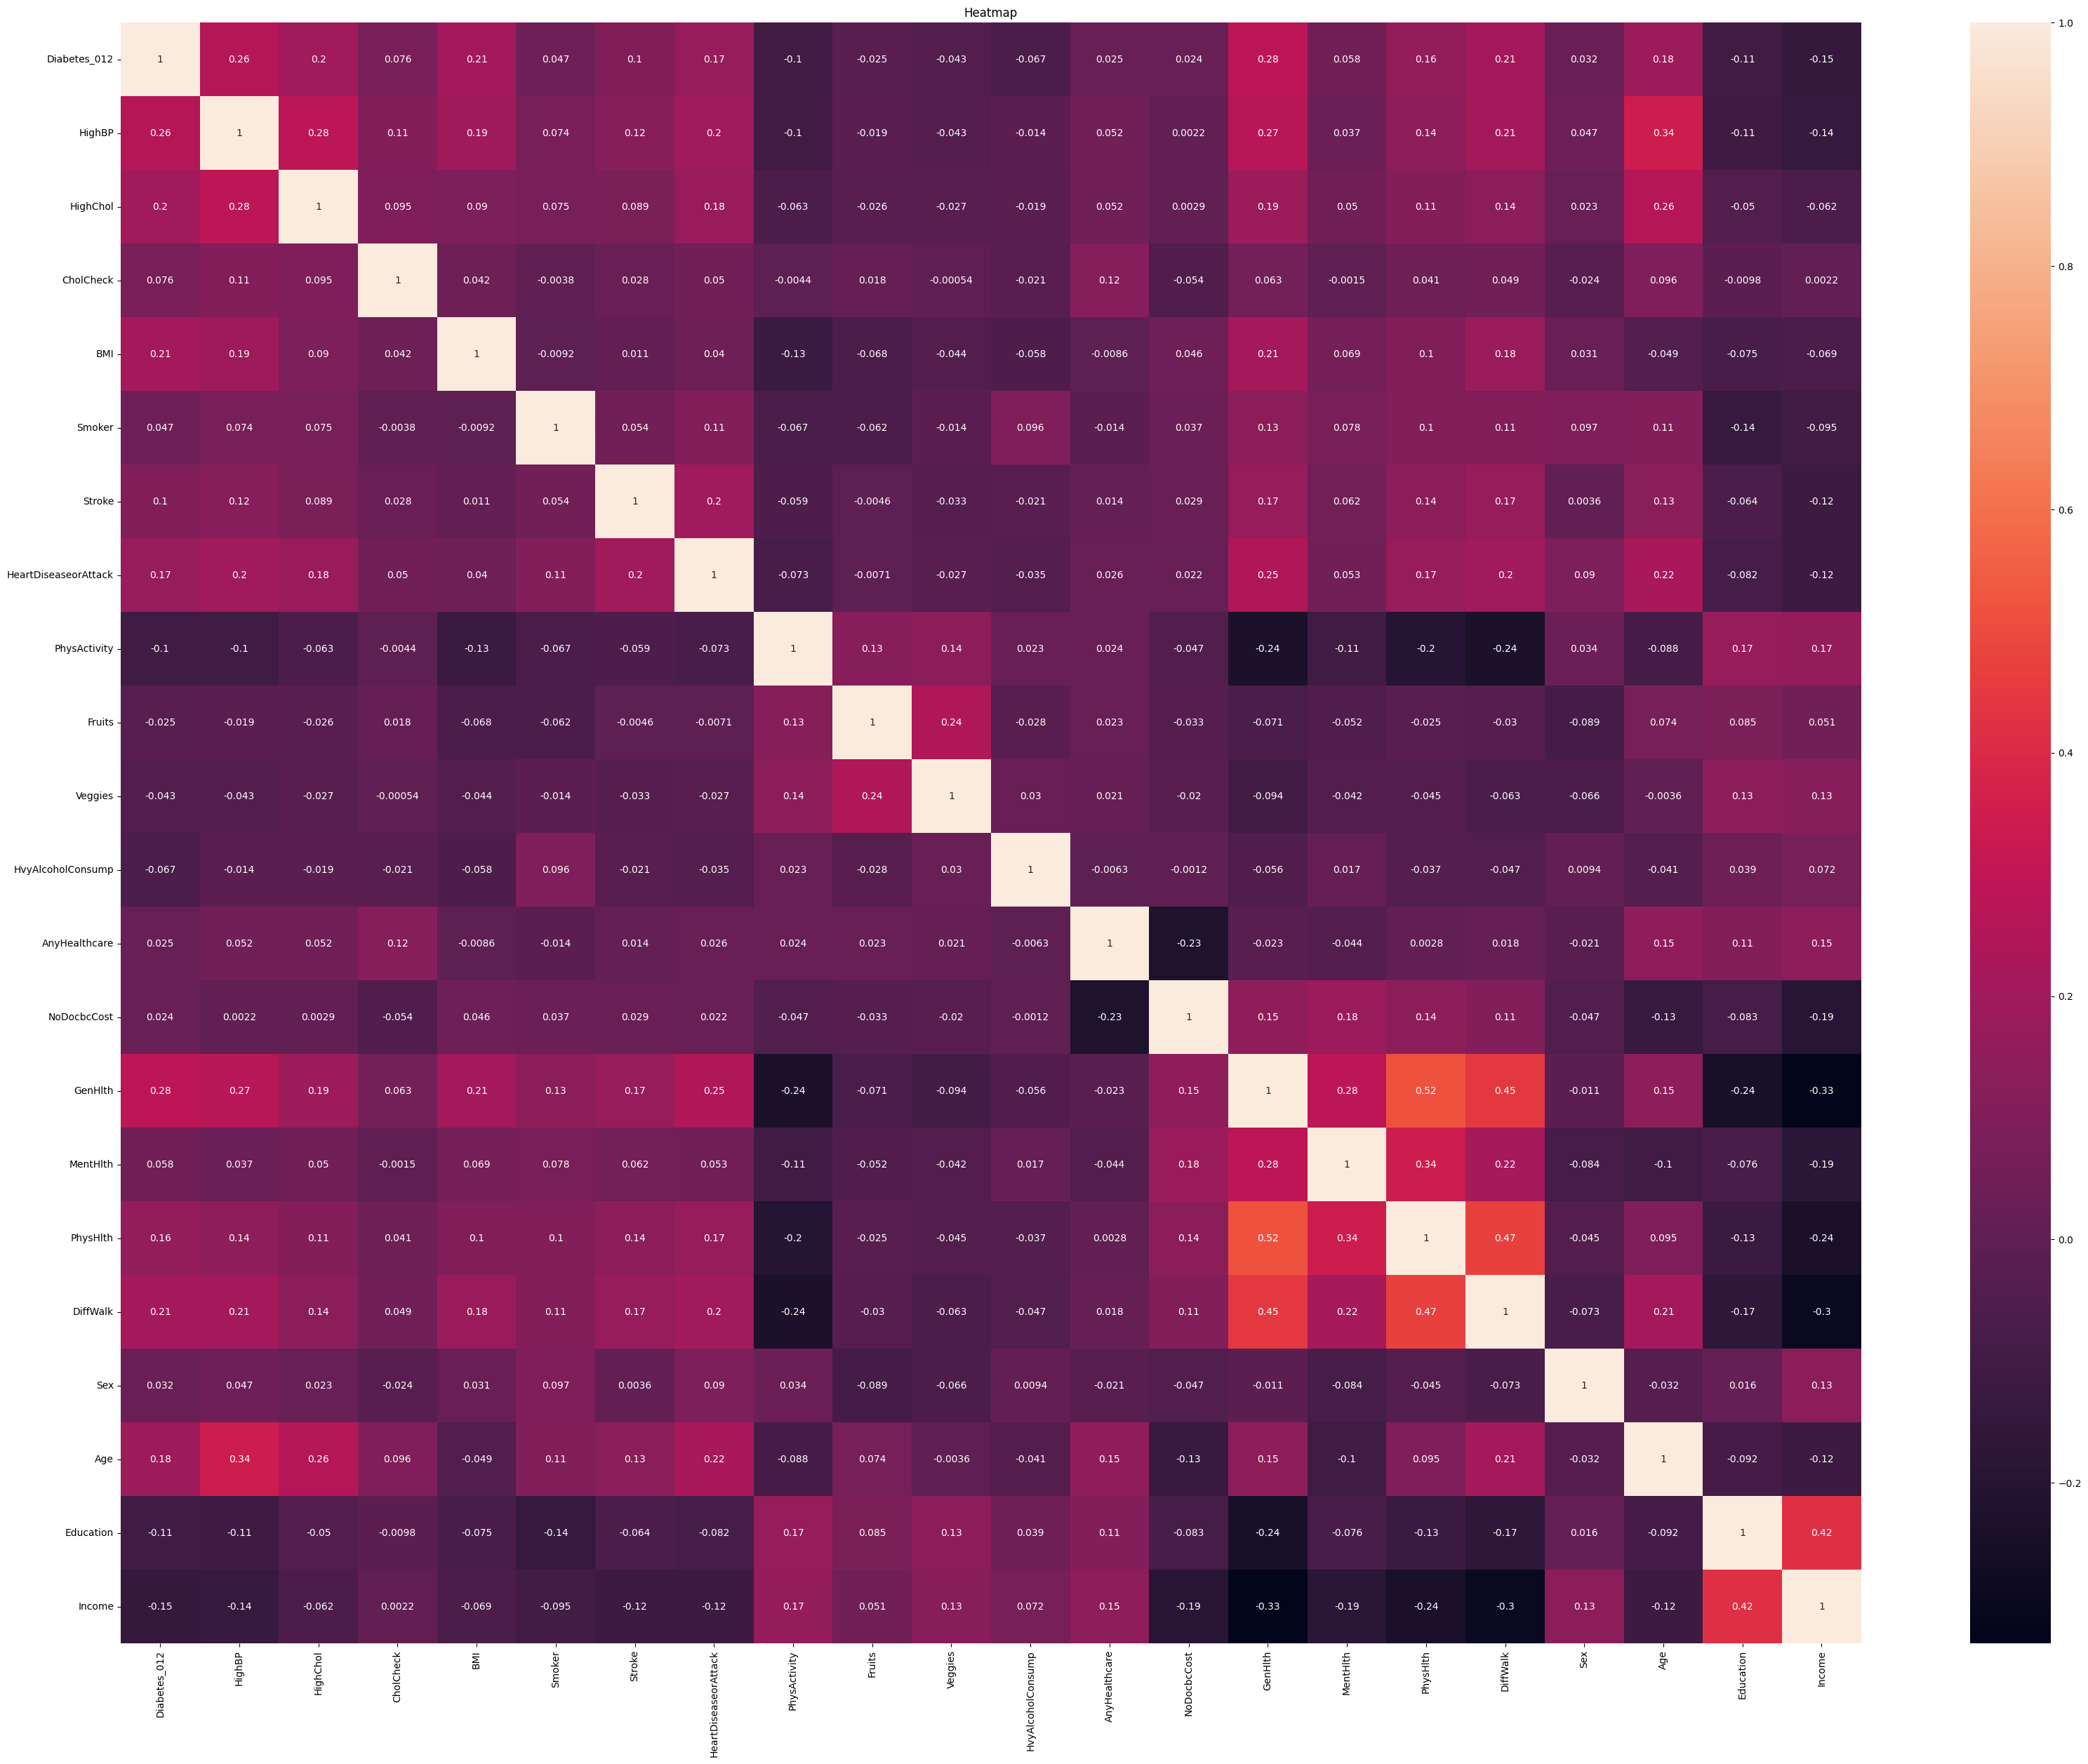

In [23]:
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap')
plt.show()

##### Observation: Certain features which are Age, DiffWalk, GenHlth, BMI, HighChol, HighBP are positively correlated with our target.

## Feature Selection

Dropping `'Smoker', 'Sex', 'Fruits', 'Veggies', 'NoDocbcCost', 'PhysActivity', 'AnyHealthcare', 'Education', 'Stroke', 'CholCheck', 'HvyAlcoholConsump'` features that are of no strong importance

In [24]:
cols_to_drop = ['Diabetes_012', 'BMI', 'Smoker', 'Sex', 'Fruits', 'Veggies', 'NoDocbcCost', 'PhysActivity', 'AnyHealthcare', 'Education', 'Stroke', 'CholCheck', 'HvyAlcoholConsump']

In [31]:
# Mapping BMI categories to numerical values
df['BMI_category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf], labels=[0, 1, 2, 3, 4, 5])

### Splitting the dataset 

In [32]:
X = df.drop(cols_to_drop, axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
y_train.value_counts()

Diabetes_012
0.0    152043
2.0     28078
1.0      3703
Name: count, dtype: int64

#### Oversampling the minority classes to get rid of class imbalance using SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

Diabetes_012
0.0    152043
2.0    152043
1.0    152043
Name: count, dtype: int64

In [38]:
y_test.value_counts()

Diabetes_012
0.0    38012
2.0     7019
1.0      926
Name: count, dtype: int64

#### Functions for plotting the confusion matrix, showing the classification report and plotting the feature importance (XGBoost only) to evaluate each model

In [39]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 3))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds', xticklabels=["0","1", "2"], yticklabels=["0","1", "2"])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def show_classification_report(y_test, y_pred):
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

def plot_feature_importances(clf, X):
    feature_importances = clf.feature_importances_

    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', legend=False, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

In [44]:
X.isna()

,HighBP,HighChol,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income,BMI_category
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False


#### Training the LDA model and evaluating it 

In [41]:
lda_classifier = LinearDiscriminantAnalysis()

lda_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = lda_classifier.predict(X_test)

plot_confusion_matrix(y_test, y_pred)
show_classification_report(y_test, y_pred)

ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Training the XGB Classifier model and evaluating it

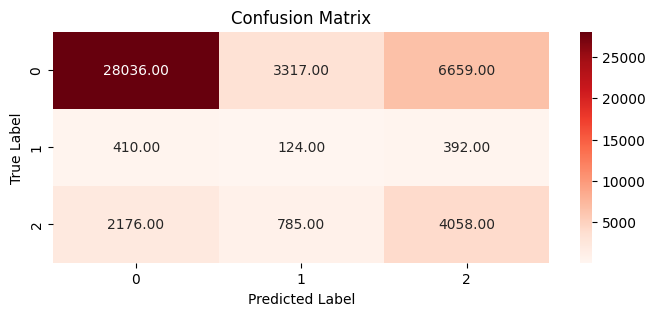

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82     38012
         1.0       0.03      0.13      0.05       926
         2.0       0.37      0.58      0.45      7019

    accuracy                           0.70     45957
   macro avg       0.44      0.48      0.44     45957
weighted avg       0.81      0.70      0.75     45957



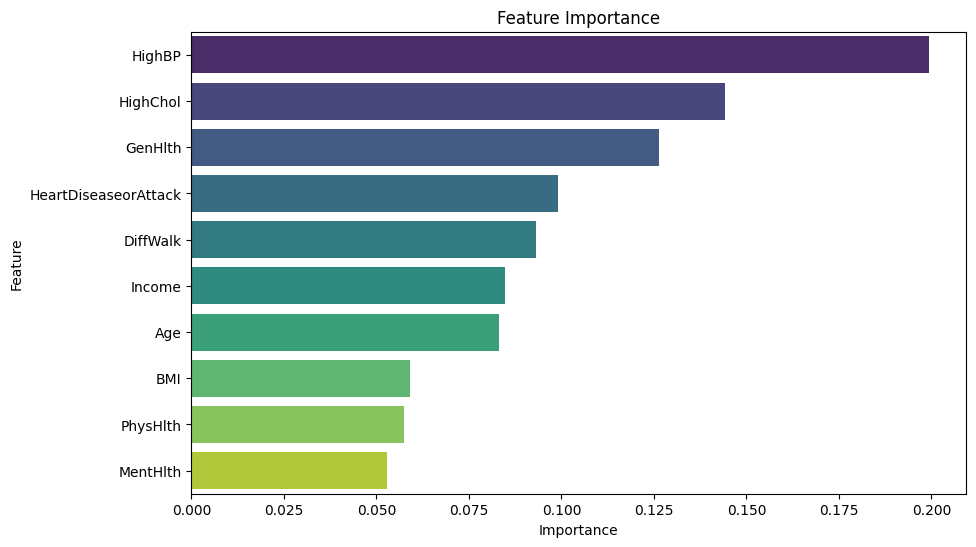

In [ ]:
class_weights = {0: 1.8, 1: 17, 2: 3.7}
sample_weights = np.array([class_weights[y] for y in y_train_resampled])

xgb_classifier = XGBClassifier(n_estimators=100)

xgb_classifier.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights)
y_pred = xgb_classifier.predict(X_test)

plot_confusion_matrix(y_test, y_pred)
show_classification_report(y_test, y_pred)
plot_feature_importances(xgb_classifier, X_train_resampled)

#### Undersampling the majority classes to get rid of class imbalance to be fed to LR model

In [ ]:
us = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = us.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

Diabetes_012
0.0    3703
1.0    3703
2.0    3703
Name: count, dtype: int64

#### Training the logistic regression model and evaluating it

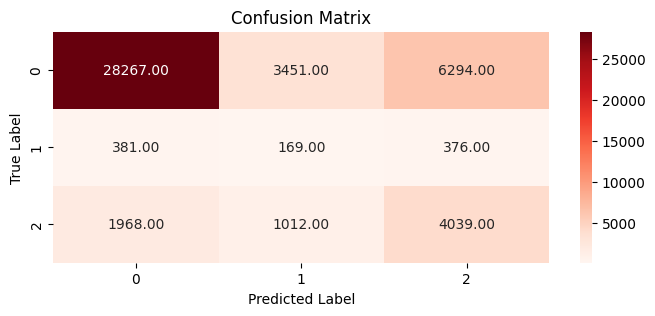

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82     38012
         1.0       0.04      0.18      0.06       926
         2.0       0.38      0.58      0.46      7019

    accuracy                           0.71     45957
   macro avg       0.45      0.50      0.45     45957
weighted avg       0.82      0.71      0.75     45957



In [ ]:
log_reg = LogisticRegression(max_iter=1500)
class_weights = {0: 1.3, 1: 1, 2: 1}
sample_weights = np.array([class_weights[y] for y in y_train_resampled])

log_reg.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights)
y_pred = log_reg.predict(X_test)

plot_confusion_matrix(y_test, y_pred)
show_classification_report(y_test, y_pred)

##### We can conclude that a Logistic Regression model is the best candidate to be used